The data in question was created using a tool called the "Faker" library, which is a software library that generates fake data that looks like real data. This means that the data is not actually real data that was collected from the real world.

In recent years, there have been reports of people using automated programs (called "bots") to manipulate the results of data science competitions. To try and prevent this from happening, some people came up with the idea to create a simulated dataset. This means that the data was intentionally created to look like real data, but it was not actually collected from the real world.

This is the first time that this simulated dataset has been created, and the creators are looking for feedback and suggestions on how to improve it. They want to make sure that the data is high quality and meaningful for people who want to use it for research or other purposes.

NAME: The name of the individual.\
GENDER: The gender of the individual, either male or female.\
EMAIL_ID: The email address of the individual.\
IS_GLOGIN: A boolean indicating whether the individual used Google login to register or not.\
FOLLOWER_COUNT: The number of followers the individual has.\
FOLLOWING_COUNT: The number of individuals the individual is following.\
DATASET_COUNT: The number of datasets the individual has created.\
CODE_COUNT: The number of notebooks the individual has created.\
DISCUSSION_COUNT: The number of discussions the individual has participated in.\
AVG_NB_READ_TIME_MIN: The average time spent reading notebooks in minutes.\
REGISTRATION_IPV4: The IP address used to register.\
REGISTRATION_LOCATION: The location from where the individual registered.\
TOTAL_VOTES_GAVE_NB: The total number of votes the individual has given to notebooks.\
TOTAL_VOTES_GAVE_DS: The total number of votes the individual has given to datasets.\
TOTAL_VOTES_GAVE_DC: The total number of votes the individual has given to discussion comments.\
ISBOT: A boolean indicating whether the individual is a bot or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Moses K\bot_analysis\Data/kaggle_bot_accounts.csv')

In [22]:
df.head()

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False


In [23]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
df.shape

(41073, 16)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41073 entries, 0 to 41072
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   38609 non-null  object 
 1   GENDER                 38727 non-null  object 
 2   EMAIL_ID               38659 non-null  object 
 3   IS_GLOGIN              38566 non-null  object 
 4   FOLLOWER_COUNT         38560 non-null  float64
 5   FOLLOWING_COUNT        38679 non-null  float64
 6   DATASET_COUNT          38607 non-null  float64
 7   CODE_COUNT             38668 non-null  float64
 8   DISCUSSION_COUNT       38613 non-null  float64
 9   AVG_NB_READ_TIME_MIN   38666 non-null  float64
 10  REGISTRATION_IPV4      38684 non-null  object 
 11  REGISTRATION_LOCATION  38679 non-null  object 
 12  TOTAL_VOTES_GAVE_NB    38627 non-null  float64
 13  TOTAL_VOTES_GAVE_DS    38638 non-null  float64
 14  TOTAL_VOTES_GAVE_DC    38614 non-null  float64
 15  IS

In [26]:
df.isnull().sum()

NAME                     2464
GENDER                   2346
EMAIL_ID                 2414
IS_GLOGIN                2507
FOLLOWER_COUNT           2513
FOLLOWING_COUNT          2394
DATASET_COUNT            2466
CODE_COUNT               2405
DISCUSSION_COUNT         2460
AVG_NB_READ_TIME_MIN     2407
REGISTRATION_IPV4        2389
REGISTRATION_LOCATION    2394
TOTAL_VOTES_GAVE_NB      2446
TOTAL_VOTES_GAVE_DS      2435
TOTAL_VOTES_GAVE_DC      2459
ISBOT                    2442
dtype: int64

In [27]:
df.duplicated().sum()

0

> We don't have any duplicate values in our dataset

In [28]:
clmns=['GENDER','IS_GLOGIN','ISBOT']
for i in clmns:
    print(f"The Value counts of {i} :")
    print(df[i].value_counts().to_string(),'\n')

The Value counts of GENDER :
Male      29056
Female     9671 

The Value counts of IS_GLOGIN :
False    24526
True     14040 

The Value counts of ISBOT :
False    28107
True     10524 



> From the above we can understand Our data is imbalanced

# **EDA**

### **Univariate Analysis**

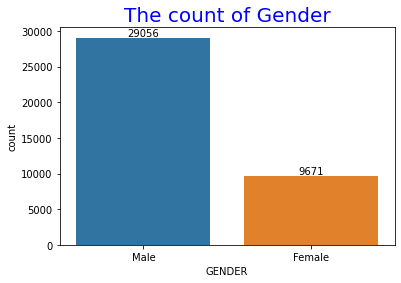

In [29]:
count=sns.countplot(x=df.GENDER,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of Gender",color='b',size=20)
plt.show()

> In gendder highest is male with 932220 

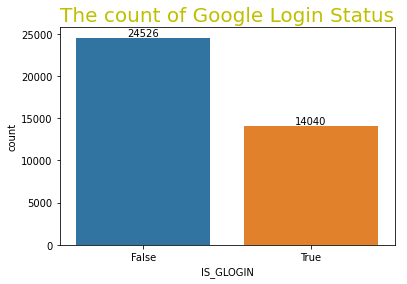

In [30]:
count=sns.countplot(x=df.IS_GLOGIN,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of Google Login Status ",color='y',size=20,loc='left')
plt.show()

> Most of them are not login in google

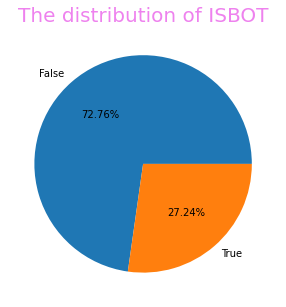

In [31]:
plt.figure(figsize=(10,5))
plt.pie(df.ISBOT.value_counts().values,
        labels=['False','True'],autopct='%1.2f%%')
plt.title("The distribution of ISBOT",color='violet',size=20)
plt.show()

> Not bot is having 73%

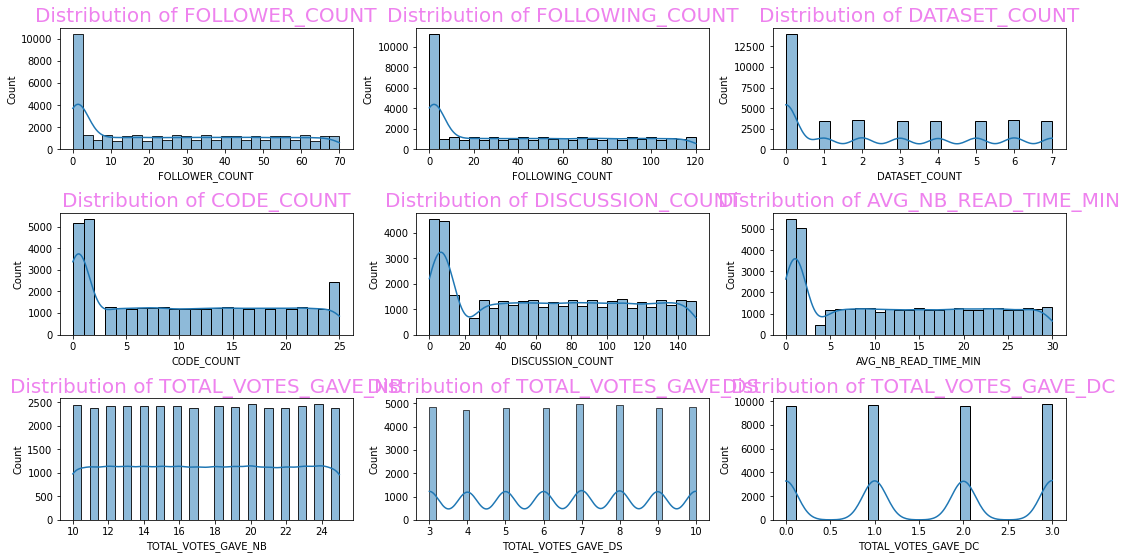

In [32]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}",fontdict= {'fontsize':20,'color':'violet'})
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

> No feature is perfectly following the normal distribution

### **Bivariate Analysis**

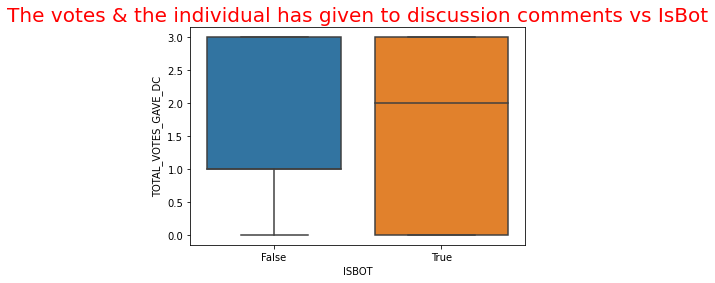

In [33]:
sns.boxplot(x=df.ISBOT,y=df.TOTAL_VOTES_GAVE_DC)
plt.title("The votes & the individual has given to discussion comments vs IsBot",color='red',size=20)
plt.show()

> The highest discussion comments are there on not bot

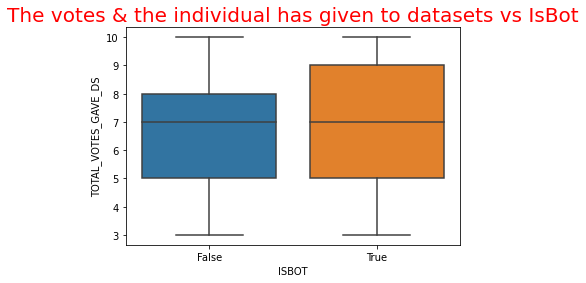

In [34]:
sns.boxplot(x=df.ISBOT,y=df.TOTAL_VOTES_GAVE_DS)
plt.title("The votes & the individual has given to datasets vs IsBot",color='red',size=20)
plt.show()

### **Multivariate Analysis**

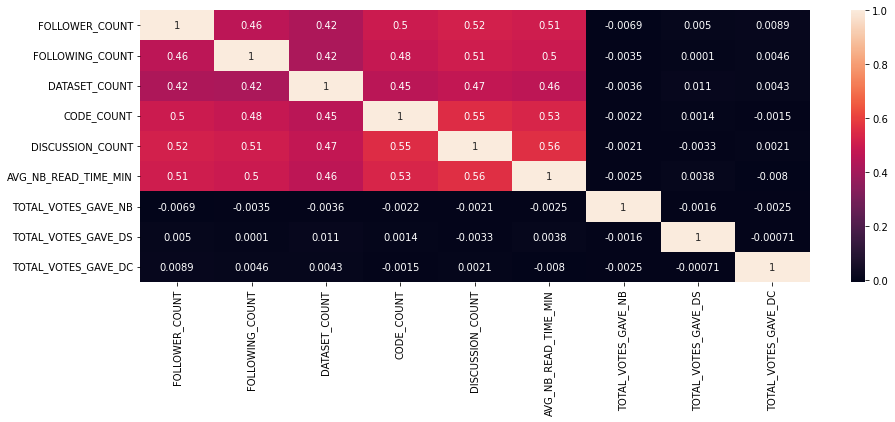

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

> There is no relation any good relationship among the features

### **Descriptive Analysis**

In [36]:
df.describe()

,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
count,38560.000000,38679.000000,38607.000000,38668.000000,38613.000000,38666.000000,38627.00000,38638.000000,38614.000000
mean,26.782313,44.630420,2.542337,10.294326,65.457592,12.694847,17.49279,6.512604,1.503341
std,22.978706,39.496692,2.501362,8.260117,47.666639,9.607675,4.60984,2.287247,1.119617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.00000,3.000000,0.000000
25%,2.000000,3.000000,0.000000,1.000000,12.000000,1.830000,13.00000,5.000000,1.000000
50%,24.000000,38.000000,2.000000,10.000000,64.000000,12.170000,17.00000,7.000000,2.000000
75%,47.000000,79.000000,5.000000,18.000000,107.000000,21.197500,21.00000,8.000000,3.000000
max,70.000000,120.000000,7.000000,25.000000,150.000000,29.990000,25.00000,10.000000,3.000000


In [37]:
df.skew()

IS_GLOGIN               0.565106
FOLLOWER_COUNT          0.336878
FOLLOWING_COUNT         0.375430
DATASET_COUNT           0.456399
CODE_COUNT              0.236423
DISCUSSION_COUNT        0.138889
AVG_NB_READ_TIME_MIN    0.185817
TOTAL_VOTES_GAVE_NB     0.001552
TOTAL_VOTES_GAVE_DS    -0.011818
TOTAL_VOTES_GAVE_DC    -0.001880
ISBOT                   1.022380
dtype: float64

In [38]:
df.drop(columns=['NAME','EMAIL_ID','REGISTRATION_IPV4'],inplace=True)

In [39]:
df.head()

,GENDER,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,Male,False,53.0,87.0,5.0,3.0,124.0,NaN,Argentina,16.0,10.0,3.0,NaN
1,Male,True,16.0,67.0,5.0,NaN,26.0,24.97,New Zealand,14.0,5.0,2.0,NaN
2,Male,True,44.0,81.0,4.0,17.0,125.0,7.75,Costa Rica,16.0,4.0,0.0,False
3,Male,True,23.0,114.0,5.0,24.0,67.0,13.40,Italy,21.0,10.0,1.0,False
4,Female,False,46.0,112.0,2.0,12.0,63.0,24.83,Belgium,10.0,6.0,2.0,False


In [40]:
df.shape

(41073, 13)

In [41]:
df.columns

Index(['GENDER', 'IS_GLOGIN', 'FOLLOWER_COUNT', 'FOLLOWING_COUNT',
       'DATASET_COUNT', 'CODE_COUNT', 'DISCUSSION_COUNT',
       'AVG_NB_READ_TIME_MIN', 'REGISTRATION_LOCATION', 'TOTAL_VOTES_GAVE_NB',
       'TOTAL_VOTES_GAVE_DS', 'TOTAL_VOTES_GAVE_DC', 'ISBOT'],
      dtype='object')

### **Handling Missing Values**

In [42]:
df.isnull().sum()

GENDER                   2346
IS_GLOGIN                2507
FOLLOWER_COUNT           2513
FOLLOWING_COUNT          2394
DATASET_COUNT            2466
CODE_COUNT               2405
DISCUSSION_COUNT         2460
AVG_NB_READ_TIME_MIN     2407
REGISTRATION_LOCATION    2394
TOTAL_VOTES_GAVE_NB      2446
TOTAL_VOTES_GAVE_DS      2435
TOTAL_VOTES_GAVE_DC      2459
ISBOT                    2442
dtype: int64

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
Si=SimpleImputer(strategy='median')

In [45]:
df['FOLLOWER_COUNT']=Si.fit_transform(df[['FOLLOWER_COUNT']])
df['FOLLOWING_COUNT']=Si.fit_transform(df[['FOLLOWING_COUNT']])
df['DATASET_COUNT']=Si.fit_transform(df[['DATASET_COUNT']])
df['CODE_COUNT']=Si.fit_transform(df[['CODE_COUNT']])
df['DISCUSSION_COUNT']=Si.fit_transform(df[['DISCUSSION_COUNT']])
df['AVG_NB_READ_TIME_MIN']=Si.fit_transform(df[['AVG_NB_READ_TIME_MIN']])
df['TOTAL_VOTES_GAVE_NB']=Si.fit_transform(df[['TOTAL_VOTES_GAVE_NB']])
df['TOTAL_VOTES_GAVE_DS']=Si.fit_transform(df[['TOTAL_VOTES_GAVE_DS']])
df['TOTAL_VOTES_GAVE_DC']=Si.fit_transform(df[['TOTAL_VOTES_GAVE_DC']])

In [46]:
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0])
df['IS_GLOGIN']=df['IS_GLOGIN'].fillna(df['IS_GLOGIN'].mode()[0])
df['REGISTRATION_LOCATION']=df['REGISTRATION_LOCATION'].fillna(df['REGISTRATION_LOCATION'].mode()[0])
df['ISBOT']=df['ISBOT'].fillna(df['ISBOT'].mode()[0])

In [47]:
df.isnull().sum()

GENDER                   0
IS_GLOGIN                0
FOLLOWER_COUNT           0
FOLLOWING_COUNT          0
DATASET_COUNT            0
CODE_COUNT               0
DISCUSSION_COUNT         0
AVG_NB_READ_TIME_MIN     0
REGISTRATION_LOCATION    0
TOTAL_VOTES_GAVE_NB      0
TOTAL_VOTES_GAVE_DS      0
TOTAL_VOTES_GAVE_DC      0
ISBOT                    0
dtype: int64

### **Handling Outliers**

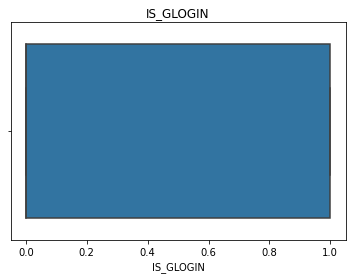

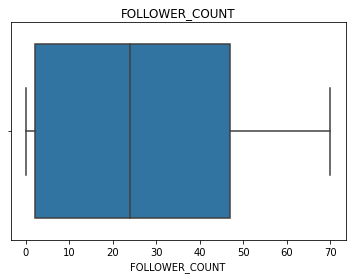

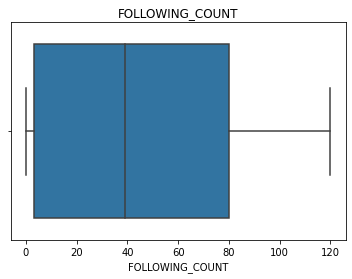

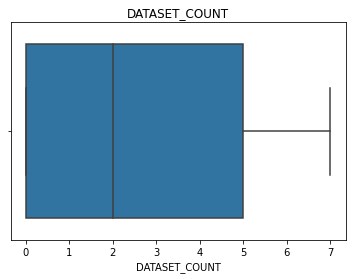

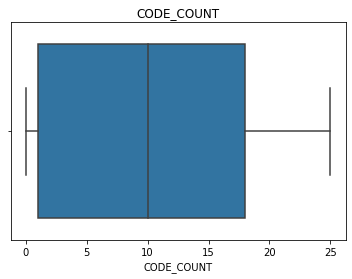

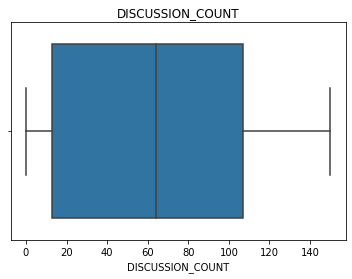

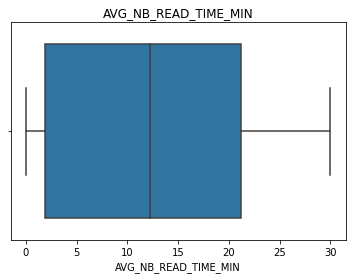

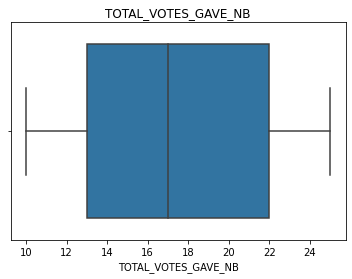

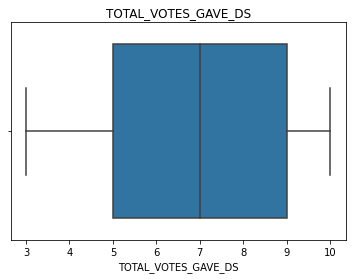

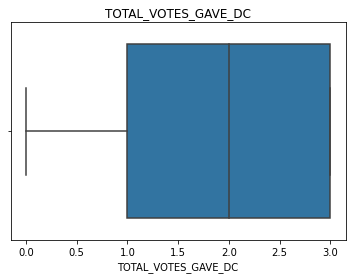

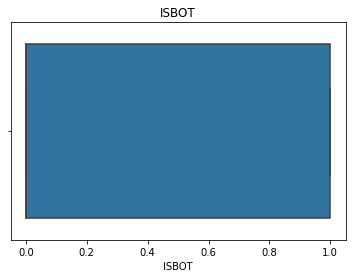

In [34]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

> We don't have any outliers in our data set

### **Handling categorical data**

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder=LabelEncoder()

In [50]:
df['GENDER']=encoder.fit_transform(df['GENDER'])
df['IS_GLOGIN']=encoder.fit_transform(df['IS_GLOGIN'])
df['REGISTRATION_LOCATION']=encoder.fit_transform(df['REGISTRATION_LOCATION'])
df['ISBOT']=encoder.fit_transform(df['ISBOT'])

In [51]:
df.head()

,GENDER,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,1,0,53.0,87.0,5.0,3.0,124.0,12.17,9,16.0,10.0,3.0,0
1,1,1,16.0,67.0,5.0,10.0,26.0,24.97,155,14.0,5.0,2.0,0
2,1,1,44.0,81.0,4.0,17.0,125.0,7.75,51,16.0,4.0,0.0,0
3,1,1,23.0,114.0,5.0,24.0,67.0,13.40,106,21.0,10.0,1.0,0
4,0,0,46.0,112.0,2.0,12.0,63.0,24.83,20,10.0,6.0,2.0,0


### **Splitting the data**

In [52]:
features_=df.drop('ISBOT',axis=1)
y_label=df[['ISBOT']]

### **Scaling**

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()

In [55]:
clmn_names=features_.columns

In [56]:
scaled=scaler.fit_transform(features_)

In [57]:
features=pd.DataFrame(scaled,columns=clmn_names)

In [58]:
features

,GENDER,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
0,0.554954,-0.720670,1.184678,1.114619,1.025417,-0.907953,1.268551,-0.052999,-1.633818,-0.327251,1.556925,1.343403
1,0.554954,1.387598,-0.476426,0.593234,1.025417,-0.034572,-0.851842,1.320008,0.506425,-0.774485,-0.693942,0.427608
2,0.554954,1.387598,0.780625,0.958204,0.613640,0.838808,1.290188,-0.527116,-1.018132,-0.327251,-1.144115,-1.403983
3,0.554954,1.387598,-0.162163,1.818490,1.025417,1.712189,0.035261,0.078938,-0.211876,0.790834,1.556925,-0.488188
4,-1.801951,-0.720670,0.870415,1.766351,-0.209914,0.214965,-0.051285,1.304991,-1.472567,-1.668952,-0.243769,0.427608
...,...,...,...,...,...,...,...,...,...,...,...,...
41068,-1.801951,-0.720670,-0.162163,1.010342,-0.621691,-0.533647,1.225278,1.398313,0.843586,1.461685,-0.693942,-0.488188
41069,-1.801951,1.387598,-1.015163,-0.918785,-1.033468,0.838808,1.095458,-0.665489,-0.461082,1.461685,1.106751,1.343403
41070,0.554954,-0.720670,1.454046,1.218897,-0.209914,-0.783185,1.766195,-0.453102,-1.765751,-0.103634,-1.594288,0.427608
41071,-1.801951,-0.720670,0.825520,1.479589,1.848972,0.339734,1.506555,-0.755593,1.385976,-0.998102,-0.243769,1.343403


### **Train,Test and Split**

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(features,y_label,train_size=0.8,stratify=y_label,random_state=42)

In [61]:
x_train.head()

,GENDER,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
2241,-1.801951,1.387598,-0.251953,0.436818,-0.209914,0.838808,0.749271,1.490562,-0.094603,-1.445335,-0.693942,-0.488188
13644,0.554954,1.387598,1.947888,1.818490,1.437195,1.587421,0.489631,-0.044418,0.696994,-1.221719,1.556925,-0.488188
22271,0.554954,-0.720670,1.274467,1.714213,0.201863,1.836958,-0.029649,0.421118,-0.211876,-0.103634,-1.594288,-1.403983
34073,0.554954,-0.720670,-1.194741,-1.101270,-1.033468,-1.157491,-1.306212,-1.304796,-1.751092,-0.998102,-0.243769,0.427608
26371,0.554954,1.387598,1.498941,0.515026,1.025417,1.712189,1.268551,1.772672,-0.695630,-1.445335,1.556925,-1.403983


In [62]:
x_train.shape

(32858, 12)

In [63]:
y_train.shape

(32858, 1)

In [64]:
x_test.shape

(8215, 12)

In [65]:
y_test.shape

(8215, 1)

## headline1

### **Balancing**

In [66]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smote=SMOTE(sampling_strategy=1)

In [69]:
x_train,y_train=smote.fit_resample(x_train,y_train)

In [70]:
pd.DataFrame(y_train).value_counts()

ISBOT
0        24439
1        24439
dtype: int64

### **Model Building**

**KNN**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
def KNN_model(x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    KNN=knn.fit(x_train,y_train)
    predict_knn=KNN.predict(x_test)
    training_accuracy=KNN.score(x_train,y_train)
    testing_accuracy=KNN.score(x_test,y_test)
    print("*** KNeighborsClassifier ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_knn))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_knn))
    print("** Classification Report **")
    print(classification_report(y_test,predict_knn))

In [73]:
KNN_model(x_train,x_test,y_train,y_test)

*** KNeighborsClassifier ***
Training Accuracy :  0.9886247391464462
Testing Accuracy :  0.9811320754716981
Accuracy Score :  0.9811320754716981
** Confusion Matrix **
[[5956  154]
 [   1 2104]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      6110
           1       0.93      1.00      0.96      2105

    accuracy                           0.98      8215
   macro avg       0.97      0.99      0.98      8215
weighted avg       0.98      0.98      0.98      8215



**Logistic Regression**

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
def Logistic(x_train,x_test,y_train,y_test):
    lgr=LogisticRegression()
    logistic=lgr.fit(x_train,y_train)
    predict_logistic=logistic.predict(x_test)
    training_accuracy=logistic.score(x_train,y_train)
    testing_accuracy=logistic.score(x_test,y_test)
    print("*** Logistic Regression ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_logistic))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_logistic))
    print("** Classification Report **")
    print(classification_report(y_test,predict_logistic))

In [76]:
Logistic(x_train,x_test,y_train,y_test)

*** Logistic Regression ***
Training Accuracy :  0.988993002987029
Testing Accuracy :  0.9821059038344492
Accuracy Score :  0.9821059038344492
** Confusion Matrix **
[[5964  146]
 [   1 2104]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6110
           1       0.94      1.00      0.97      2105

    accuracy                           0.98      8215
   macro avg       0.97      0.99      0.98      8215
weighted avg       0.98      0.98      0.98      8215



**Random** **Forest**

In [77]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()

In [78]:
def Random_Forest(x_train,x_test,y_train,y_test):
    rdf=RandomForestClassifier()
    random=rdf.fit(x_train,y_train)
    predict_random=random.predict(x_test)
    training_accuracy=random.score(x_train,y_train)
    testing_accuracy=random.score(x_test,y_test)
    print("*** Random Forest ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_random))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_random))
    print("** Classification Report **")
    print(classification_report(y_test, predict_random))

In [79]:
Random_Forest(x_train,x_test,y_train,y_test)

*** Random Forest ***
Training Accuracy :  1.0
Testing Accuracy :  0.9825928180158248
Accuracy Score :  0.9825928180158248
** Confusion Matrix **
[[5967  143]
 [   0 2105]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6110
           1       0.94      1.00      0.97      2105

    accuracy                           0.98      8215
   macro avg       0.97      0.99      0.98      8215
weighted avg       0.98      0.98      0.98      8215



**Cross Validation**

In [89]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(random,x_train,y_train,cv=11)
np.mean(cv)

0.9892794340510721

### Hyper Tuning 
#### Random Forest

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 500,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_cv = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_cv)

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [82]:
rf=RandomForestClassifier()
randomcv_rf=RandomizedSearchCV(estimator=rf,param_distributions=random_cv,n_iter=100,cv=3)

In [83]:
randomcv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]})

In [84]:
best_random_cv=randomcv_rf.best_estimator_

In [85]:
y_pred=best_random_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[5967  143]
 [   0 2105]]
Accuracy Score 0.9825928180158248
Classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6110
           1       0.94      1.00      0.97      2105

    accuracy                           0.98      8215
   macro avg       0.97      0.99      0.98      8215
weighted avg       0.98      0.98      0.98      8215



**Naive Bayes**

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
def Naive_Bayes(x_train,x_test,y_train,y_test):
    gnb=GaussianNB()
    naive=gnb.fit(x_train,y_train)
    predict_naive=naive.predict(x_test)
    training_accuracy=naive.score(x_train,y_train)
    testing_accuracy=naive.score(x_test,y_test)
    print("*** Naive Bayes ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_naive))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_naive))
    print("** Classification Report **")
    print(classification_report(y_test, predict_naive))

In [122]:
Naive_Bayes(x_train,x_test,y_train,y_test)

*** Naive Bayes ***
Training Accuracy :  0.9883612273891011
Testing Accuracy :  0.9822781937826186
Accuracy Score :  0.9822781937826186
** Confusion Matrix **
[[32160   747]
 [   34 11129]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     32907
           1       0.94      1.00      0.97     11163

    accuracy                           0.98     44070
   macro avg       0.97      0.99      0.98     44070
weighted avg       0.98      0.98      0.98     44070



**XG Boost**

In [123]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
from xgboost import XGBClassifier

In [125]:
def xgboost(x_train,x_test,y_train,y_test):
    xgb=XGBClassifier()
    XGB=xgb.fit(x_train,y_train)
    predict_XGB=XGB.predict(x_test)
    training_accuracy=XGB.score(x_train,y_train)
    testing_accuracy=XGB.score(x_test,y_test)
    print("*** XGBoost ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_XGB))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_XGB))
    print("** Classification Report **")
    print(classification_report(y_test, predict_XGB))

In [126]:
xgboost(x_train,x_test,y_train,y_test)

*** XGBoost ***
Training Accuracy :  0.9894704054577639
Testing Accuracy :  0.9834581347855684
Accuracy Score :  0.9834581347855684
** Confusion Matrix **
[[32181   726]
 [    3 11160]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     32907
           1       0.94      1.00      0.97     11163

    accuracy                           0.98     44070
   macro avg       0.97      0.99      0.98     44070
weighted avg       0.98      0.98      0.98     44070



### **Model Comparison**

In [127]:
def comparison(x_train,x_test,y_train,y_test):
    KNN_model(x_train,x_test,y_train,y_test)
    print('-'*100)
    Logistic(x_train,x_test,y_train,y_test)
    print('-'*100)
    Random_Forest(x_train,x_test,y_train,y_test)
    print('-'*100)
    Naive_Bayes(x_train,x_test,y_train,y_test)
    print('-'*100)
    xgboost(x_train,x_test,y_train,y_test)

In [128]:
comparison(x_train,x_test,y_train,y_test)

*** KNeighborsClassifier ***
Training Accuracy :  0.9890411687394115
Testing Accuracy :  0.9826866348990243
Accuracy Score :  0.9826866348990243
** Confusion Matrix **
[[32155   752]
 [   11 11152]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     32907
           1       0.94      1.00      0.97     11163

    accuracy                           0.98     44070
   macro avg       0.97      0.99      0.98     44070
weighted avg       0.98      0.98      0.98     44070

----------------------------------------------------------------------------------------------------
*** Logistic Regression ***
Training Accuracy :  0.9890829528447379
Testing Accuracy :  0.9833219877467665
Accuracy Score :  0.9833219877467665
** Confusion Matrix **
[[32174   733]
 [    2 11161]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     32907
          

In [88]:
rdf=RandomForestClassifier()
random=rdf.fit(x_train,y_train)
predict_random=random.predict(x_test)
print("*** Random Forest ***")
print("Accuracy Score : ",accuracy_score(y_test, predict_random))
print("** Confusion Matrix **")
print(confusion_matrix(y_test, predict_random))
print("** Classification Report **")
print(classification_report(y_test, predict_random))

*** Random Forest ***
Accuracy Score :  0.9825928180158248
** Confusion Matrix **
[[5967  143]
 [   0 2105]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6110
           1       0.94      1.00      0.97      2105

    accuracy                           0.98      8215
   macro avg       0.97      0.99      0.98      8215
weighted avg       0.98      0.98      0.98      8215



**Testing**

In [ ]:
random.predict([[0.554958, -0.724663,	1.173023,	1.104255,	1.017640,	-0.920041,	1.261972,	-0.045856,	-1.638298,	-0.343100,	1.559029,	1.347591]])

**Saving the Model**

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/The Smartbridge/Projects/Bot_model.pkl', 'wb') as file:
    pickle.dump(random, file)